# **Introduction to regression and classification**

## **Linear regression with scikit-learn - a simple introduction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [3]:
revenue = np.array([2.6, 19., 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [4]:
df = pd.DataFrame(data = {'budget': budget, 'revenue': revenue})

In [5]:
df

,budget,revenue
0,5,2.6
1,10,19.0
2,17,23.8
3,27,26.9
4,35,41.1
5,40,58.3
6,42,40.3
7,49,58.7
8,54,73.1
9,60,69.7


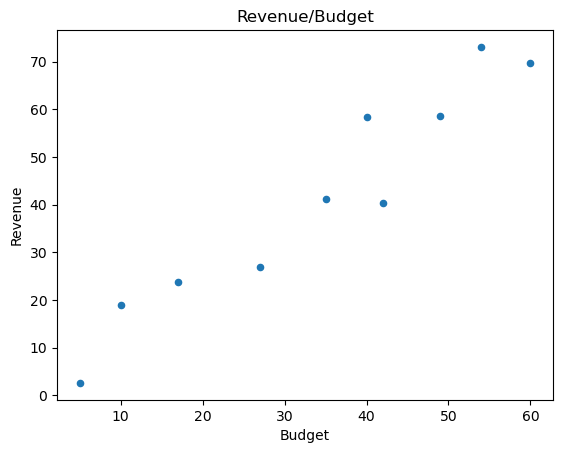

In [6]:
df.plot(kind = 'scatter', x = 'budget', y = 'revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue/Budget')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [8]:
lm = LinearRegression(fit_intercept = True)

In [9]:
lm.fit(X = df.budget.to_frame(), y = df.revenue)

LinearRegression()

In [10]:
intercept = lm.intercept_

In [11]:
intercept

0.7046849757673712

In [12]:
slope = lm.coef_

In [13]:
slope

array([1.19897684])

In [14]:
df['pred_rev'] = lm.predict(df.budget.to_frame())

In [15]:
df

,budget,revenue,pred_rev
0,5,2.6,6.699569
1,10,19.0,12.694453
2,17,23.8,21.087291
3,27,26.9,33.077060
4,35,41.1,42.668875
5,40,58.3,48.663759
6,42,40.3,51.061712
7,49,58.7,59.454550
8,54,73.1,65.449435
9,60,69.7,72.643296


In [16]:
r2_score(y_true = df['revenue'], y_pred = df['pred_rev'])

0.9225523650442049

In [17]:
x_lin = np.array([0, 100])

In [18]:
y_lin = intercept + slope * x_lin

In [19]:
y_lin

array([  0.70468498, 120.60236941])

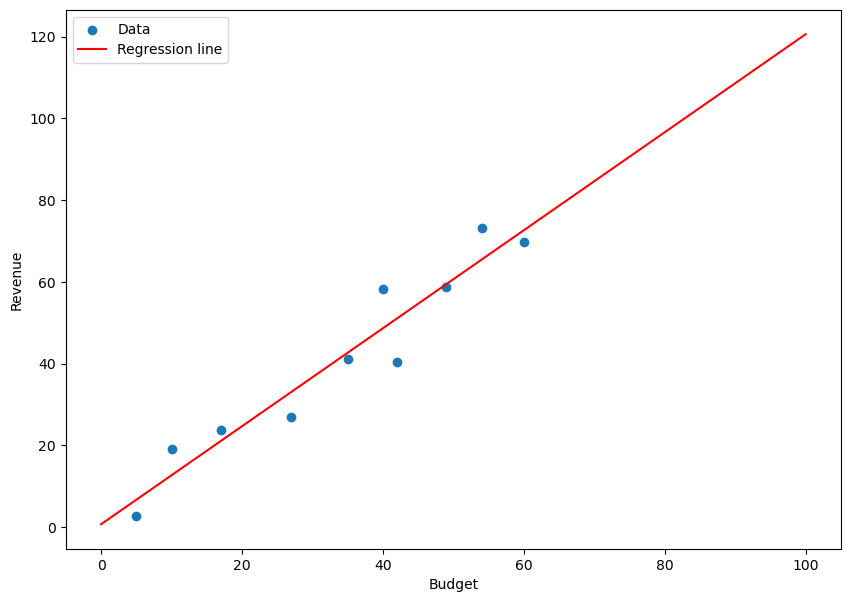

In [20]:
plt.figure(figsize = (10, 7))
plt.scatter(x = df.budget, y = df.revenue, label = 'Data')
plt.plot(x_lin, y_lin, c = 'Red', label = 'Regression line')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()
plt.show()

## **Making predictions**

In [21]:
budget_new = np.array([63, 66, 74, 80, 85])

In [22]:
revenue_new = np.array([74.2, 80.7, 98.2, 94.8, 101.7])

In [23]:
df_new = pd.DataFrame(data = {'budget': budget_new, 'revenue': revenue_new})

In [24]:
df_new

,budget,revenue
0,63,74.2
1,66,80.7
2,74,98.2
3,80,94.8
4,85,101.7


In [25]:
df_new['pred'] = lm.predict(X = df_new.budget.to_frame())

In [26]:
df_new

,budget,revenue,pred
0,63,74.2,76.240226
1,66,80.7,79.837157
2,74,98.2,89.428971
3,80,94.8,96.622833
4,85,101.7,102.617717


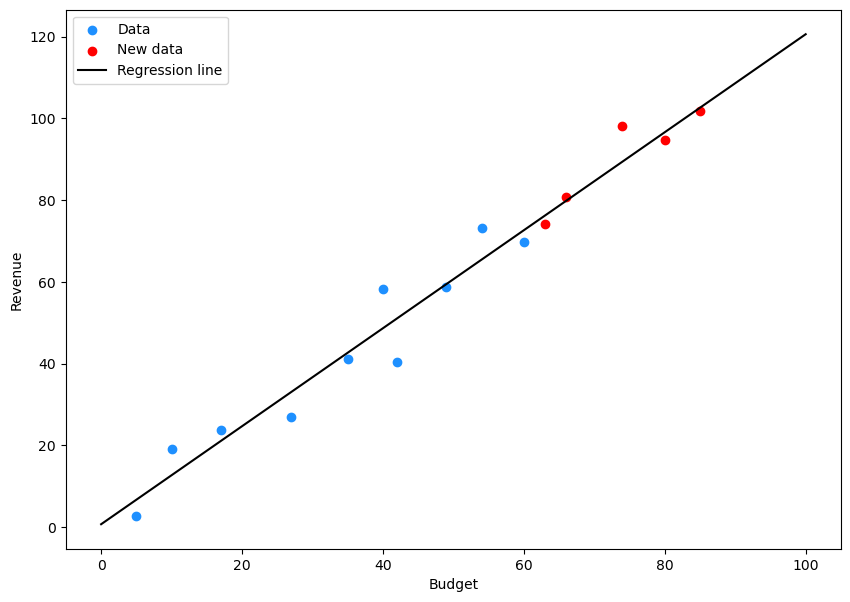

In [27]:
plt.figure(figsize = (10, 7))
plt.scatter(x = df.budget, y = df.revenue, label = 'Data', c = 'dodgerblue')
plt.scatter(x = df_new.budget, y = df_new.revenue, label = 'New data', c = 'red', )
plt.plot(x_lin, y_lin, c = 'black', label = 'Regression line')
plt.legend()
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

## **Overfitting**

In [28]:
pm = np.polyfit(x = df.budget, y = df.revenue, deg = 9)

In [29]:
pm

array([ 2.31988761e-09, -6.91663857e-07,  8.80409588e-05, -6.24271101e-03,
        2.69731803e-01, -7.29512946e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254339e+03, -1.21710591e+04])

In [30]:
x_poly = np.linspace(start = 0, stop = 100, num = 1000)

In [31]:
y_poly = np.polyval(pm, x_poly)

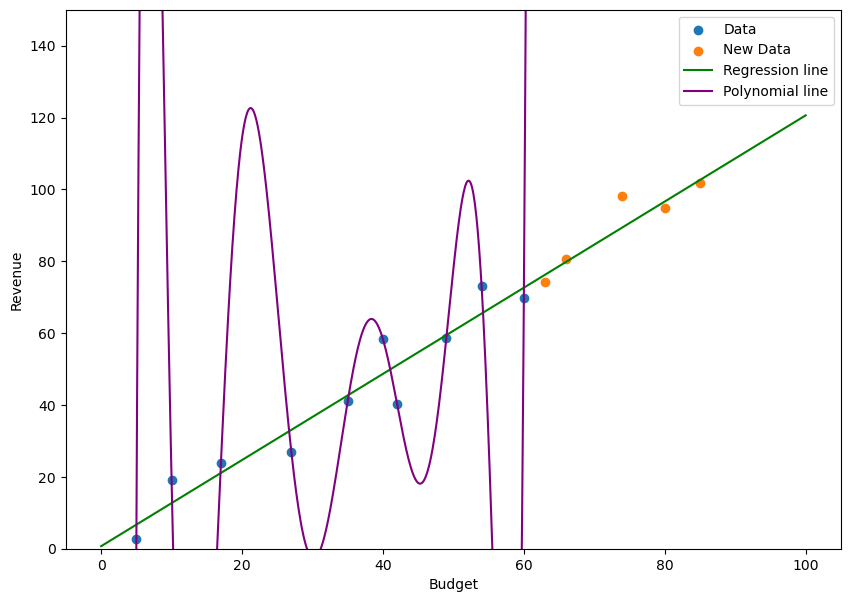

In [32]:
plt.figure(figsize = (10, 7))
plt.scatter(x = df.budget, y = df.revenue, label = 'Data')
plt.scatter(x = df_new.budget, y = df_new.revenue, label = 'New Data')
plt.plot(x_lin, y_lin, label = 'Regression line', c = 'green')
plt.plot(x_poly, y_poly, label = 'Polynomial line', c = 'purple')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.ylim(0, 150)
plt.legend()
plt.show()

## **Underfitting**

In [33]:
mean = df.revenue.mean()

In [34]:
mean

41.35000000000001

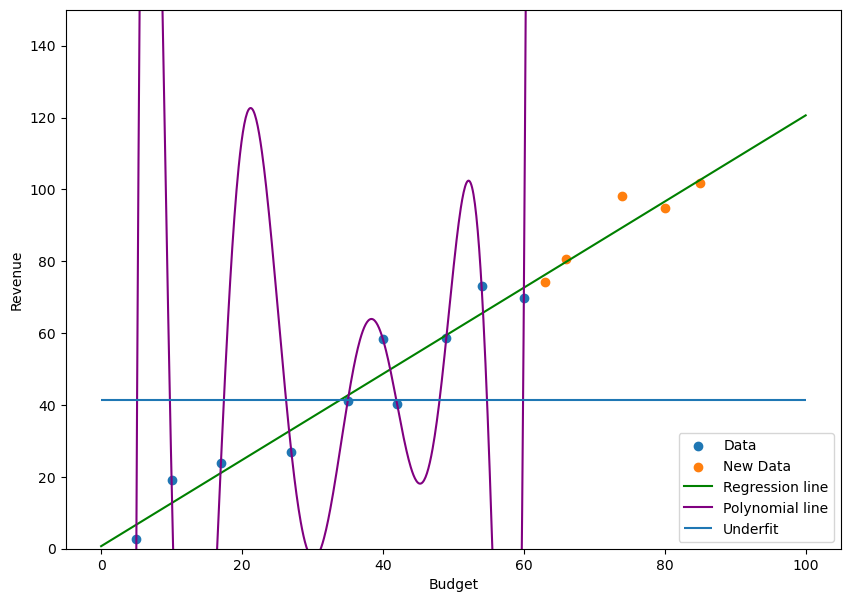

In [35]:
plt.figure(figsize = (10, 7))
plt.scatter(x = df.budget, y = df.revenue, label = 'Data')
plt.scatter(x = df_new.budget, y = df_new.revenue, label = 'New Data')
plt.plot(x_lin, y_lin, label = 'Regression line', c = 'green')
plt.plot(x_poly, y_poly, label = 'Polynomial line', c = 'purple')
plt.hlines(y = mean, xmin = 0, xmax = 100, label = 'Underfit')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.ylim(0, 150)
plt.legend()
plt.show()

## **Logistic regression with scikit-learn - a simple introduction**

In [36]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [37]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

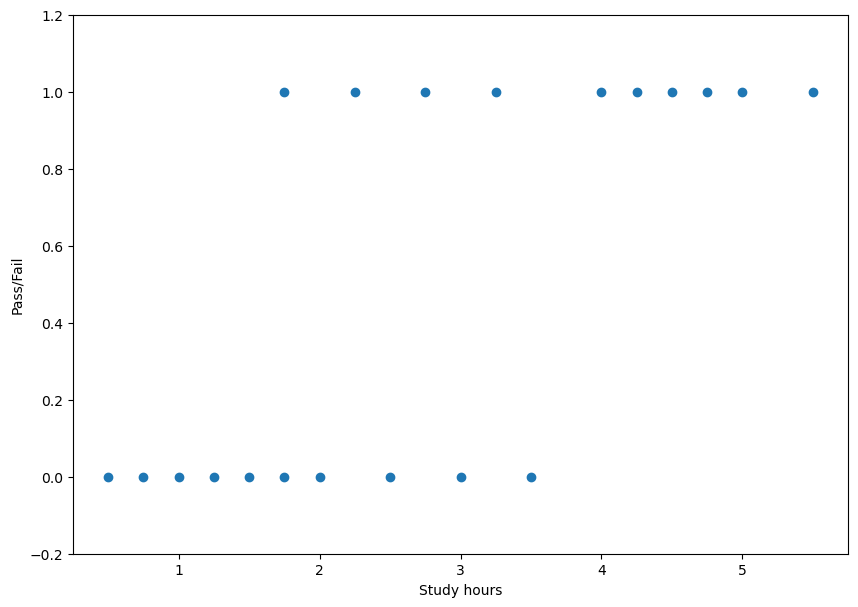

In [38]:
plt.figure(figsize = (10, 7))
plt.scatter(x = hours,y = success),
plt.xlabel('Study hours')
plt.ylabel('Pass/Fail')
plt.ylim(-0.2, 1.2)
plt.show()

In [39]:
df2 = pd.DataFrame({'hours': hours, 'success': success})

In [40]:
df2

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm2 = LinearRegression(fit_intercept = True)

In [43]:
lm2.fit(X = df2.hours.to_frame(), y = df2.success)

LinearRegression()

In [44]:
lm2.intercept_

-0.15393526898848742

In [45]:
lm2.coef_

array([0.23459561])

In [46]:
df2['pred'] = lm2.predict(df2.hours.to_frame())

In [47]:
df2

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


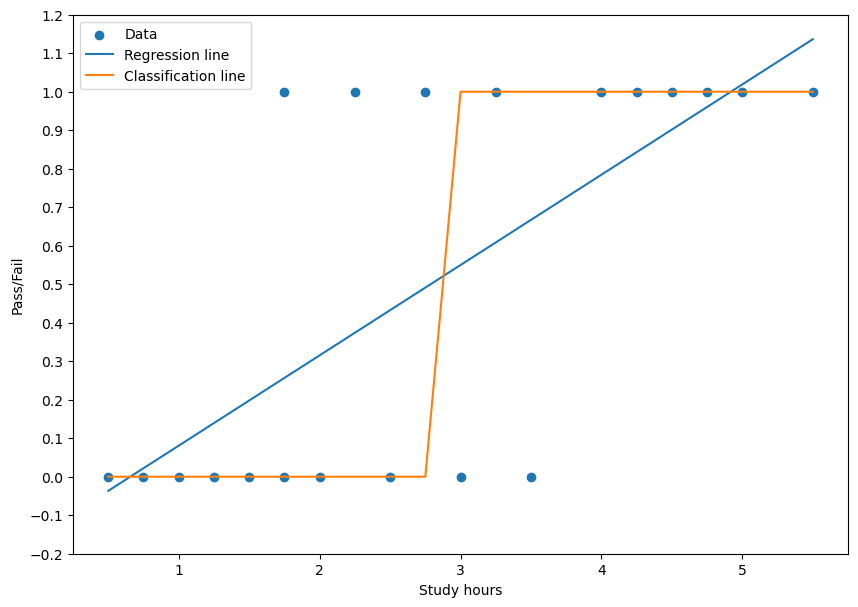

In [48]:
plt.figure(figsize = (10, 7))
plt.scatter(x = hours, y = success, label = 'Data')
plt.plot(df2.hours, df2.pred, label = 'Regression line')
plt.plot(df2.hours, np.where(df2.pred > 0.5, 1, 0), label = 'Classification line')
plt.xlabel('Study hours')
plt.ylabel('Pass/Fail')
plt.yticks(np.arange(start = -0.2, stop = 1.3, step = 0.1))
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [52]:
lr.fit(X = df2.hours.to_frame(), y = df2.success)

LogisticRegression()

In [53]:
df2['pred2'] = lr.predict(df2.hours.to_frame())

In [54]:
df2

,hours,success,pred,pred2
0,0.50,0,-0.036637,0
1,0.75,0,0.022011,0
2,1.00,0,0.080660,0
3,1.25,0,0.139309,0
4,1.50,0,0.197958,0
5,1.75,0,0.256607,0
6,1.75,1,0.256607,0
7,2.00,0,0.315256,0
8,2.25,1,0.373905,0
9,2.50,0,0.432554,0


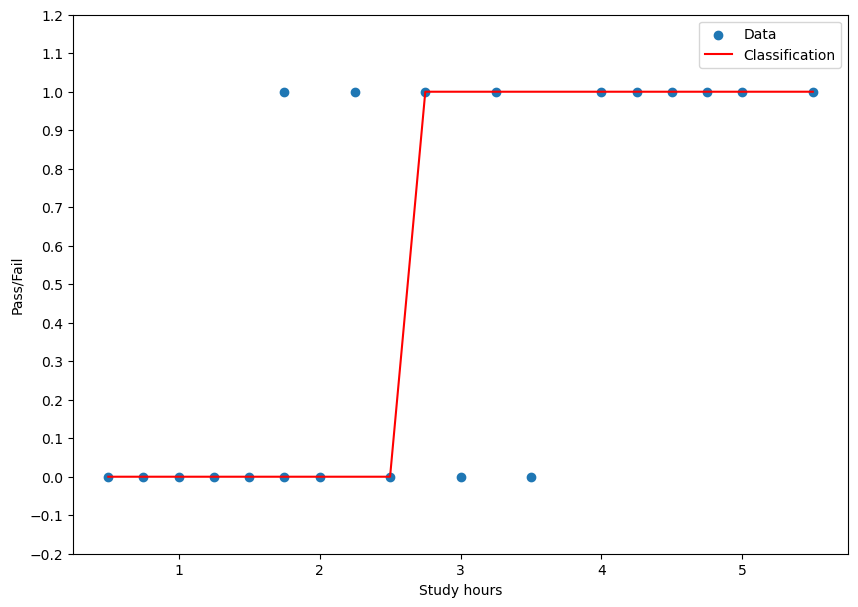

In [77]:
plt.figure(figsize = (10, 7))
plt.scatter(x = df2.hours, y = df2.success, label = 'Data')
# plt.plot(df2.hours, df2.pred, label = 'Regression line')
# plt.plot(df2.hours, np.where(df2.pred > 0.5, 1, 0), label = 'Classification line')
plt.plot(df2.hours, df2.pred2, c = 'red', label = 'Classification')
plt.xlabel('Study hours')
plt.ylabel('Pass/Fail')
plt.yticks(np.arange(start = -0.2, stop = 1.3, step = 0.1))
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

In [63]:
proba = lr.predict_proba(df2.hours.to_frame())

In [64]:
proba

array([[0.92861721, 0.07138279],
       [0.90707537, 0.09292463],
       [0.87987361, 0.12012639],
       [0.84606045, 0.15393955],
       [0.80484065, 0.19515935],
       [0.75576968, 0.24423032],
       [0.75576968, 0.24423032],
       [0.69897507, 0.30102493],
       [0.63534559, 0.36465441],
       [0.56660579, 0.43339421],
       [0.49520342, 0.50479658],
       [0.42399618, 0.57600382],
       [0.35581092, 0.64418908],
       [0.2930129 , 0.7069871 ],
       [0.18920231, 0.81079769],
       [0.14900776, 0.85099224],
       [0.11612919, 0.88387081],
       [0.08974025, 0.91025975],
       [0.06888056, 0.93111944],
       [0.03998596, 0.96001404]])

In [70]:
pd.DataFrame(proba, columns = ['0 class proba', '1 class proba'])

,0 class proba,1 class proba
0,0.928617,0.071383
1,0.907075,0.092925
2,0.879874,0.120126
3,0.846060,0.153940
4,0.804841,0.195159
5,0.755770,0.244230
6,0.755770,0.244230
7,0.698975,0.301025
8,0.635346,0.364654
9,0.566606,0.433394


In [74]:
df2 = df2.merge(pd.DataFrame(proba, columns = ['0 class proba', '1 class proba']), how = 'left', left_index = True, right_index = True)

In [75]:
df2

,hours,success,pred,pred2,0 class proba,1 class proba
0,0.50,0,-0.036637,0,0.928617,0.071383
1,0.75,0,0.022011,0,0.907075,0.092925
2,1.00,0,0.080660,0,0.879874,0.120126
3,1.25,0,0.139309,0,0.846060,0.153940
4,1.50,0,0.197958,0,0.804841,0.195159
5,1.75,0,0.256607,0,0.755770,0.244230
6,1.75,1,0.256607,0,0.755770,0.244230
7,2.00,0,0.315256,0,0.698975,0.301025
8,2.25,1,0.373905,0,0.635346,0.364654
9,2.50,0,0.432554,0,0.566606,0.433394


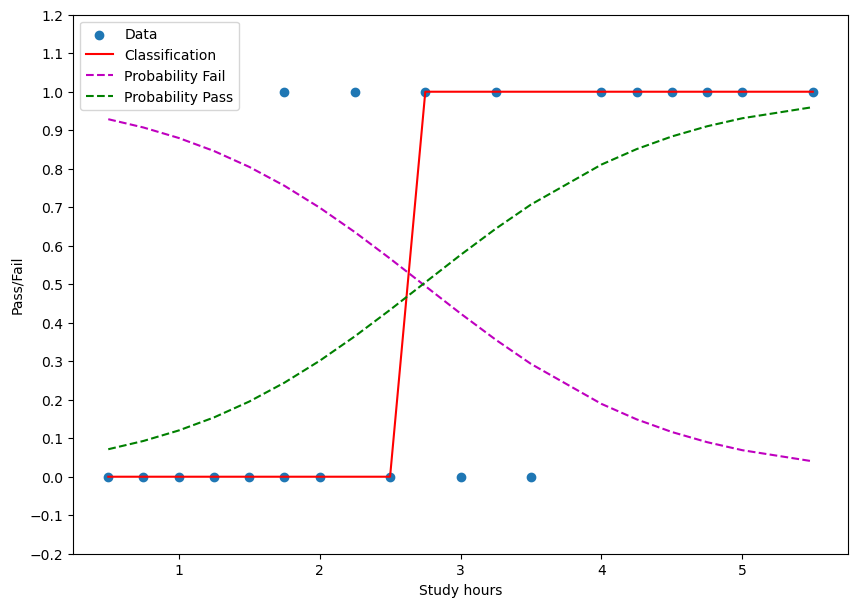

In [78]:
plt.figure(figsize = (10, 7))
plt.scatter(x = df2.hours, y = df2.success, label = 'Data')
plt.plot(df2.hours, df2.pred2, c = 'red', label = 'Classification')
plt.plot(df2.hours, proba[:, 0], "m--", label = "Probability Fail")
plt.plot(df2.hours, proba[:, 1], "g--", label = "Probability Pass")
plt.xlabel('Study hours')
plt.ylabel('Pass/Fail')
plt.yticks(np.arange(start = -0.2, stop = 1.3, step = 0.1))
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()